In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# load dataset
dataset = pd.read_csv('train.csv',index_col=None)
dataset = dataset[dataset.columns[[1,2,3,6,7,9,10,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34]]]
dataset = pd.get_dummies(dataset, drop_first=True)

In [ ]:
X, y = dataset.drop('Loan Status',axis=1), dataset['Loan Status']

In [ ]:
# Synthetic Minority Oversampling Technique 
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')


In [ ]:
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.20, random_state = 0)

## k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
accuracies = cross_val_score(estimator = tree_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.71 %
Standard Deviation: 0.35 %


In [ ]:
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

In [ ]:
# DecisionTreeClassifier
from sklearn.metrics import classification_report
labels = ['Not a loan defaulter','A loan defaulter']
print(classification_report(y_test, y_pred, target_names=labels))



                      precision    recall  f1-score   support

Not a loan defaulter       0.81      0.77      0.79     12205
    A loan defaulter       0.78      0.82      0.80     12284

            accuracy                           0.80     24489
           macro avg       0.80      0.80      0.80     24489
        weighted avg       0.80      0.80      0.80     24489



In [ ]:
cn_matrix = confusion_matrix(y_test, y_pred)
cn_matrix

array([[ 9396,  2809],
       [ 2198, 10086]])

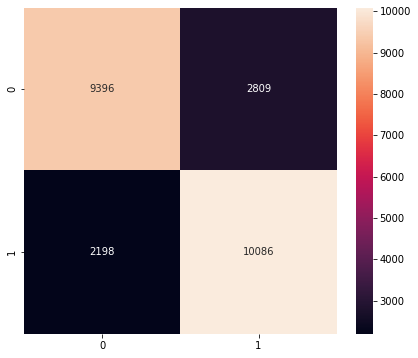

In [17]:
# Confusion matrix DecisionTreeClassifier
rcParams['figure.figsize'] = 7, 6
sns.heatmap(cn_matrix, annot=True, cbar=True,fmt='g')
plt.savefig('DecisionTreeClassifier_matrix_v3.png', dpi=720);
plt.show()